In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [109]:
dementia_df = pd.read_csv('dementia_dataset.csv')

In [110]:
dementia_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Data Cleaning

In [111]:
# Summary stats for the numerical columns
dementia_df.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [112]:
# Summary stats for the categorical columns
dementia_df.describe(include=[object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [7]:
#Removing Hand feature cause it contains just one unique value
#Removing Subject ID and MRI ID

In [113]:
#Checking for missing values

dementia_df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [9]:
#Percentage of Missing Values

dementia_df.isnull().sum()/len(dementia_df.index) * 100

Text(0.5, 1.0, 'Histogram of SES')

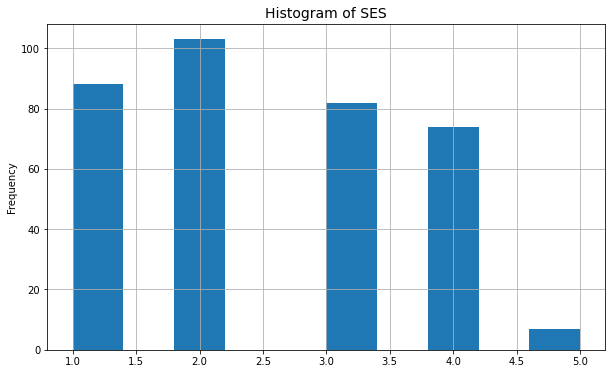

In [114]:
# Imputing missing values in SES column and MMSSE columns.

#first let's analyse the SES column

fig = plt.figure(figsize = (10,6))
dementia_df['SES'].plot(kind='hist', grid=True)
plt.title('Histogram of SES', fontsize = 14)




<AxesSubplot:ylabel='Density'>

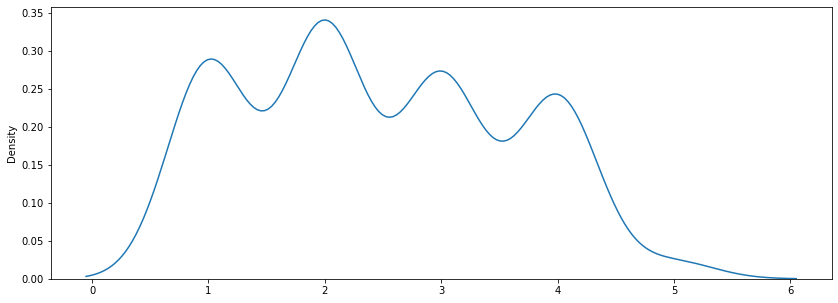

In [115]:
fig = plt.figure(figsize = (14,5))

sns.distplot(dementia_df[['SES']], hist = False)

Imputing Missing Values in SES with median
why? because  SES has values of integer type so we cannot impute float value of mean but we can impute median in place 
as both median and mean have very close values and median in this case is most representative value of SES

In [116]:
dementia_df['SES'].fillna((dementia_df['SES'].median()), inplace=True)

Text(0.5, 1.0, 'Histogram of MMSE')

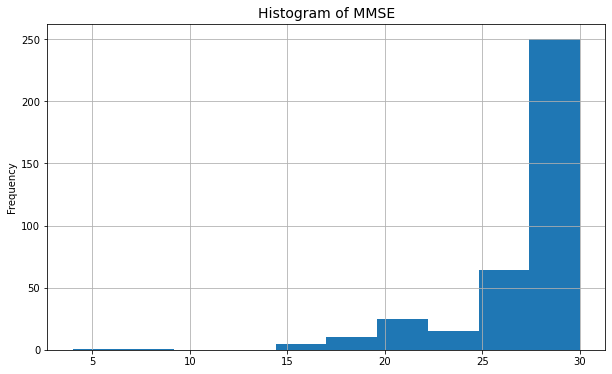

In [117]:
#Analysing the MMSE column

fig = plt.figure(figsize = (10,6))
dementia_df['MMSE'].plot(kind='hist', grid=True)
plt.title('Histogram of MMSE', fontsize = 14)

<AxesSubplot:ylabel='Density'>

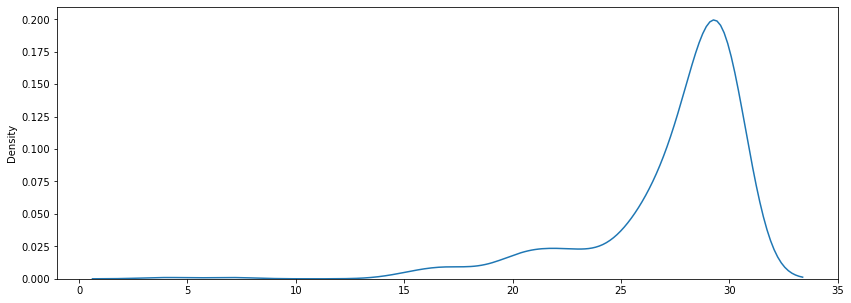

In [118]:
fig = plt.figure(figsize = (14,5))

sns.distplot(dementia_df[['MMSE']], hist = False)

In [119]:
#Imputing the missing values with median
#same reason as SES

dementia_df['MMSE'].fillna((dementia_df['MMSE'].median()), inplace=True)

In [120]:
#check for percentage of missing vales

dementia_df.isnull().sum()/len(dementia_df.index) * 100

Subject ID    0.0
MRI ID        0.0
Group         0.0
Visit         0.0
MR Delay      0.0
M/F           0.0
Hand          0.0
Age           0.0
EDUC          0.0
SES           0.0
MMSE          0.0
CDR           0.0
eTIV          0.0
nWBV          0.0
ASF           0.0
dtype: float64

In [121]:
import warnings
warnings.filterwarnings('ignore')

#### Analysing the 'Group' and CDR Column, and choosing which is best as the Target Variable

From the _Group_ Column:
- Demented : Subjects that were tagged as Demented at the start of the Study and remained so till the end of the study
- Undemented : Subjects that were tagged as Undemented at the start of the Study and remained so till the end of the study
- Converted : Subjects that were tagged as Undemented at the Start of the study, but as the study progressed were tgged as Demented

Visualizing the _Group_ column

<AxesSubplot:ylabel='Group'>

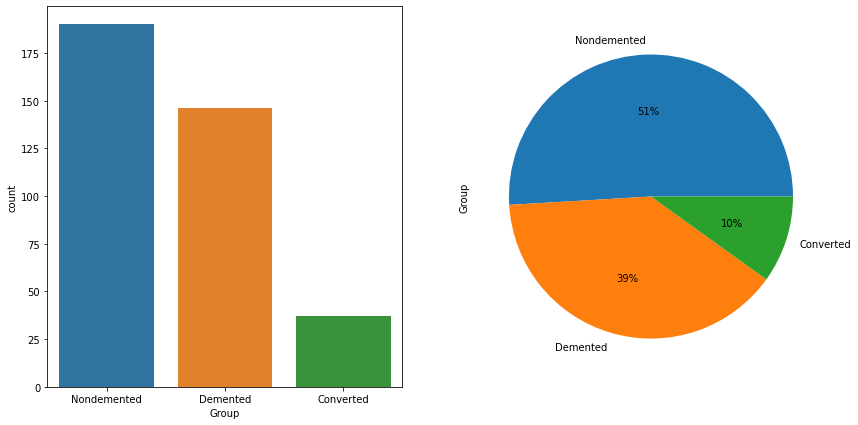

In [122]:
plt.figure(figsize=(14,7))
plt.subplot(121)
label = dementia_df['Group'].unique().tolist()
sns.countplot(dementia_df['Group'])

plt.subplot(122)
dementia_df['Group'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)


As the Converted Group, appears somewhat Obscured, lets further probe into it 

In [123]:
dementia_df.loc[dementia_df['Group'] == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,R,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,R,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,R,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,R,71,16,1.0,27.0,0.0,1289,0.771,1.362


*I personally, won't advice we make the Group column our Target column
as I feel the algorithm might have a hard time predicting which data point is Converted
as I believe having the Subject ID is important to make such distinction.
'Converted' means the subject was initially non demented during the start of the 
study, but became demented along the way, hence predicting what particular data
point is Converted is dependent on the progression of that particular subject throughout the study which can only be monitored by the Subject ID*

And Since the subject Id will be removed from the dataset, I think we should use the CDR column as our Target column




_Analysing the CDR Column_

CDR stands for Clinical Dementia Rating

The CDR Scoring Table provides descriptive anchors that guide the clinician in making appropriate ratings based on interview data and clinical judgment. In addition to ratings for each domain, an overall CDR™ score may be calculated through the use of an CDR™ Scoring Algorithm. This score is useful for characterizing and tracking a patient’s level of impairment/dementia:

- 0 = Normal
- 0.5 = Very Mild Dementia or Questionable
- 1 = Mild Dementia
- 2 = Moderate Dementia
- 3 = Severe Dementia

In [124]:
dementia_df['CDR'].unique()

array([0. , 0.5, 1. , 2. ])

From the Above, one can observed that except Normal score all other score including 0.5 have dementia symptoms because it is very crucial to detect dementia in early stages.

Hence One can group the cases having 0 score as Normal and all other score >= 0.5 as dementia

Secondly, to further support why the Group column shouldn't be our target variable, but rather the CDR column,

The description of CDR and Group seem to be measuring the same thing. CDR measures the degree of dementia while Group classifies if a person has dementia or not.

So, to eliminate bias:
- If either of the two is the target variable, the other must not be part of the features

In [125]:
#Visualizing the relationship between Group and CDR

df = dementia_df.groupby(['Group', 'CDR'])['Group'].count().unstack('CDR')

In [126]:
df

CDR,0.0,0.5,1.0,2.0
Group,,,,
Converted,18.0,19.0,NaN,NaN
Demented,NaN,102.0,41.0,3.0
Nondemented,188.0,2.0,NaN,NaN


<AxesSubplot:xlabel='Group'>

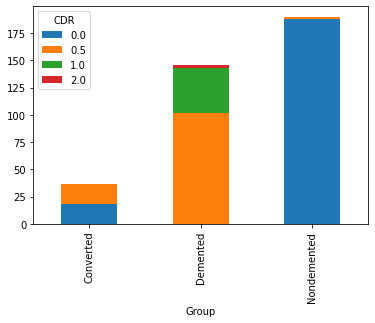

In [127]:
df.plot(kind='bar', stacked = True)

from the Table and Visualization

- All Demented Subjects have a CDR value of 0.5, 1.0 and 2.0
which is in line with the clinical definition of those CDR values
- 188 out 0f 190 Non-demented subjects have  CDR value of 0!
- Just 2 Non-demented subject have a CDR value of 0.5, which truly is inconsistent and confusing as a CDR of 0.5 is a clinical indicaion of Very mild dementia (More reason why we should use CDR as our Target variable and Not have both in the Dataset)

Conclusions:
- Group column should be removed whilst developing the features
- CDR column should be grouped, the cases having 0 score as Normal and all other score >= 0.5 as dementia
- CDR should be Used as the Target column

In [128]:
# Categorizing the CDR column

def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'


dementia_df['Cat_CDR'] = dementia_df['CDR'].apply(lambda x: cat_CDR(x))



In [129]:
dementia_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Cat_CDR
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,Dementia
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,Dementia
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,Dementia


### Continuing the analysis

Analysing MMSE

About MMSE (Mini Mental State Examination)

A practical method for grading the cognitive state of patients for the clinician study. The MMSE was designed as a screening test for the purpose of evaluating cognitive impairment in older adults. It is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment.

Interpretations:
Any score of 24 or more (out of 30) indicates a normal cognition. Below this, scores can indicate severe (≤9 points), moderate (10–18 points) or mild (19–23 points) cognitive impairment.That is, even a maximum score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing.


In [130]:
dementia_df['MMSE'].describe()

count    373.000000
mean      27.351206
std        3.675329
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [131]:
#From the definition of the MMSE Feature, let's categorize it

def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9: 
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:
        return 'Mild'


dementia_df['Cat_MMSE'] = dementia_df['MMSE'].apply(lambda x: cat_MMSE(x))

In [132]:
dementia_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Cat_CDR,Cat_MMSE
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal,Normal
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal,Normal
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,Dementia,Mild
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,Dementia,Normal
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,Dementia,Mild


<AxesSubplot:ylabel='Cat_MMSE'>

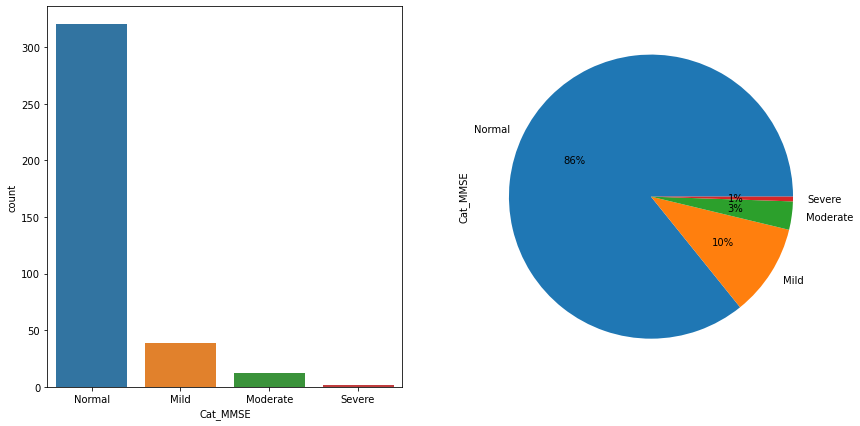

In [133]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(dementia_df['Cat_MMSE'])

plt.subplot(122)
label = dementia_df['Cat_MMSE'].unique().tolist()
dementia_df['Cat_MMSE'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)


In [134]:
# A function that makes comparison plot between Cat_CDR and other categorical variables

def cat_comparison_plot(cat):
    fig = plt.figure(figsize=(18,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    
    
    df = dementia_df.groupby([cat, 'Cat_CDR'])[cat].count().unstack('Cat_CDR')
    df.plot(kind='bar', stacked = True, ax = ax2)
    result = dementia_df.groupby(cat).apply (lambda group: (group.Cat_CDR == 'Normal').sum() / float(group.Cat_CDR.count())).to_frame('Normal')
    result['Dementia'] = 1 - result.Normal
    result.plot(kind='bar', stacked = True, ax = ax1, grid=True)
    
    plt.show()

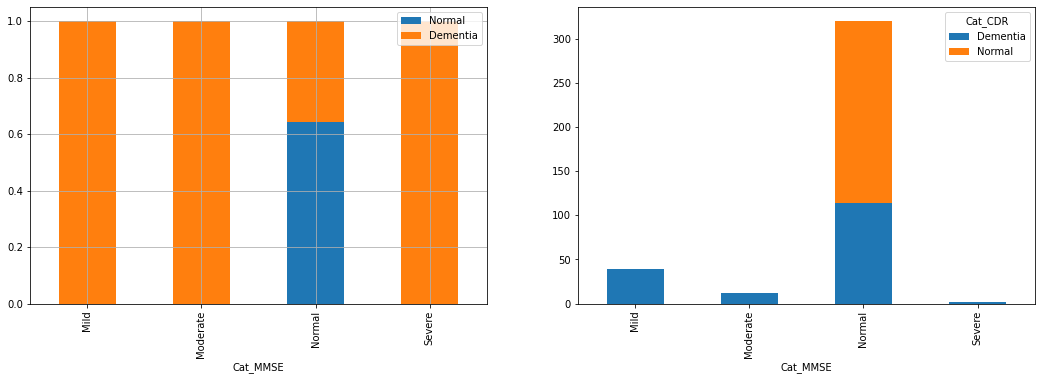

In [135]:
cat_comparison_plot('Cat_MMSE')

From the Above Plot, 
- 100% of all Mild, Moderate and Severe Cat_MMSE cases are Demented
- About 40% of the Normal Cat_MMSE cases are Demented


### Analysing Age

In [136]:
dementia_df['Age'].describe()

count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

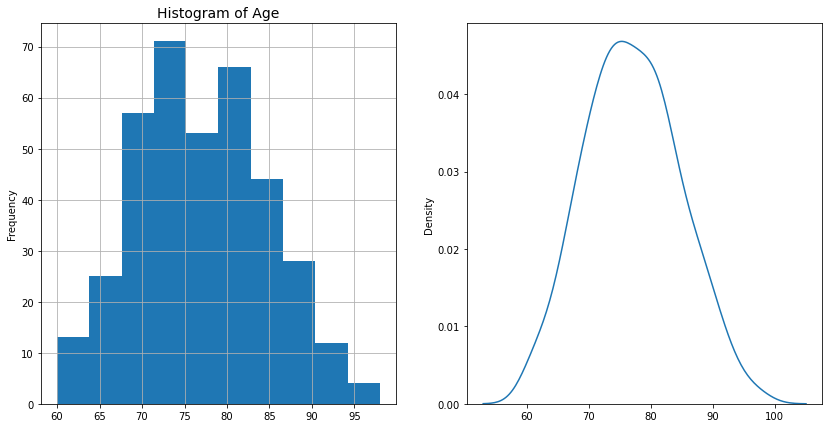

In [137]:
plt.figure(figsize=(14,7))
plt.subplot(121)
dementia_df['Age'].plot(kind='hist', grid=True)
plt.title('Histogram of Age', fontsize = 14)

plt.subplot(122)
sns.distplot(dementia_df[['Age']], hist = False)

In [138]:
#Categorizing the Age

dementia_df['Age_group'] = pd.cut(dementia_df['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])

In [139]:
dementia_df['Age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: Age_group, dtype: int64

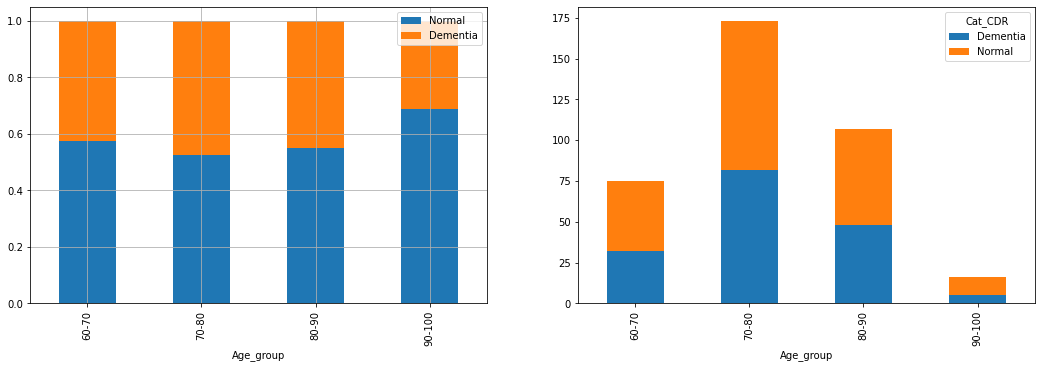

In [140]:
cat_comparison_plot('Age_group')

From the plot, majority of the Dementia cases are in age group 70-80 years

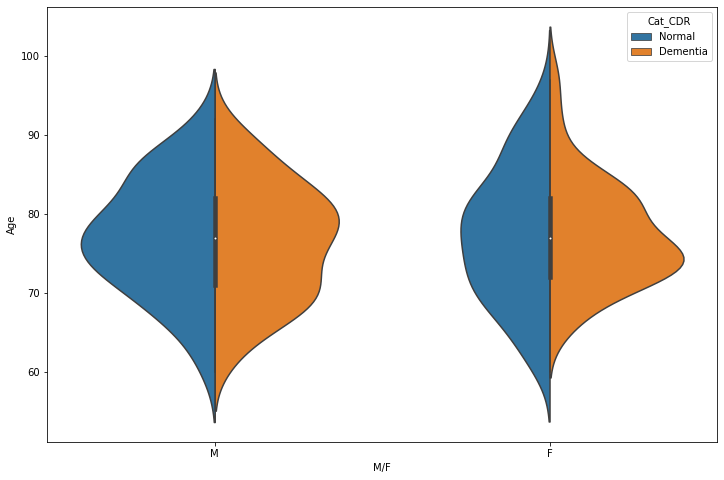

In [141]:


plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

From the Above Plot:
- In Males, number of demntia cases peaks around 80 years while in females demntia is prevlent around 75 years of age
- Male dementia starts early, before 60 years, but female dementia starts generally after 60 years

### Analysing eTIV

Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD).The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR).

In [142]:
dementia_df['eTIV'].describe()

count     373.000000
mean     1488.128686
std       176.139286
min      1106.000000
25%      1357.000000
50%      1470.000000
75%      1597.000000
max      2004.000000
Name: eTIV, dtype: float64

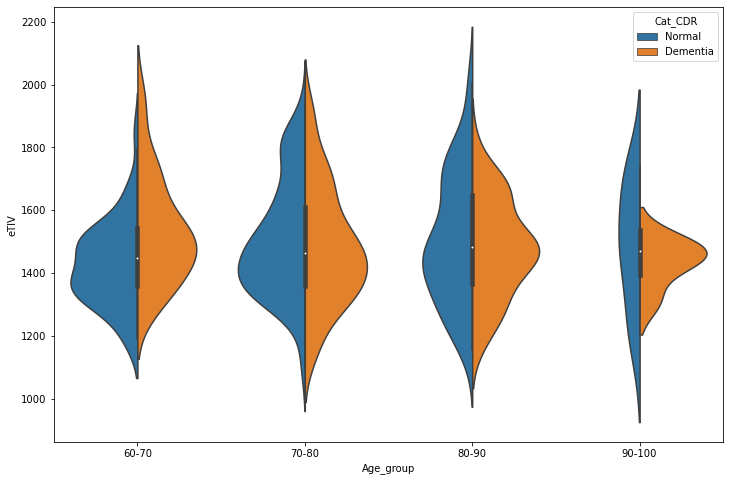

In [143]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Age_group", y="eTIV",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

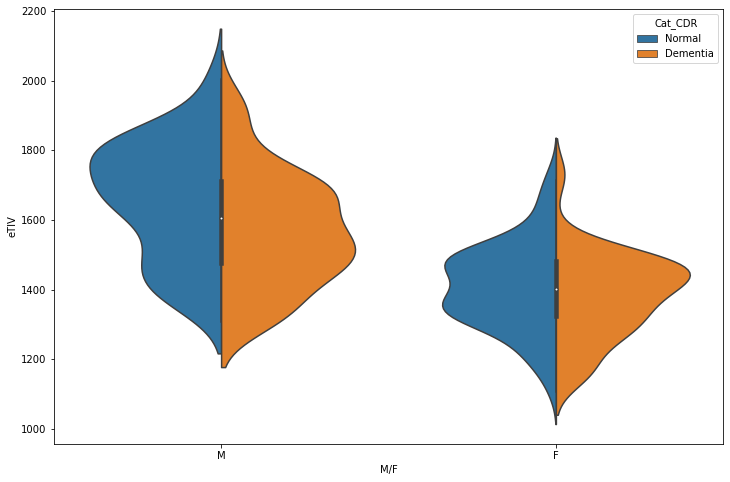

In [144]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

### Analysing nWBV

Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process

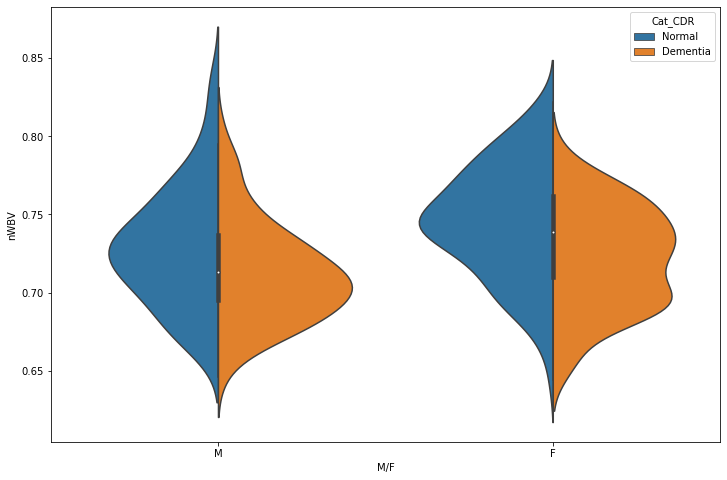

In [145]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

### Analysing EDUC

In [146]:
dementia_df['EDUC'].describe()

count    373.000000
mean      14.597855
std        2.876339
min        6.000000
25%       12.000000
50%       15.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64

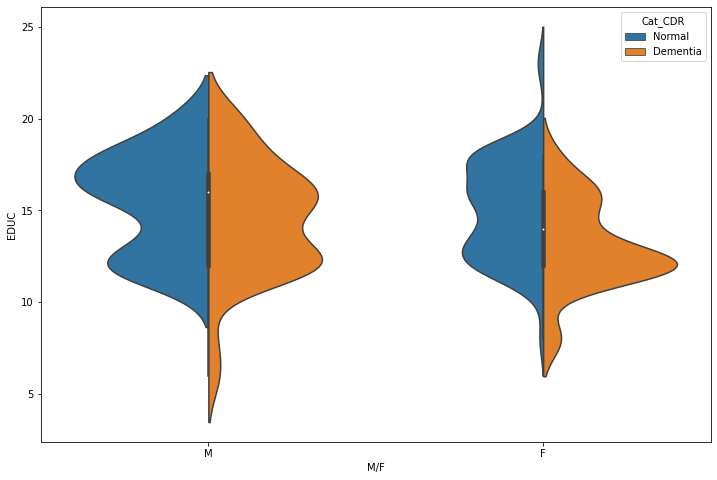

In [147]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

From the plot above:
-Men having education level between 10 and 17 have higher level of dementia cases
-Men started to show dymentia symptoms with less education levels starting from 4 years whereas females starts showing dymentia symptoms after 6 years of education level having highest peak at 13 years of age.

### Analysing SES

SES - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status

In [148]:
dementia_df['SES'].describe()

count    373.000000
mean       2.436997
std        1.109307
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

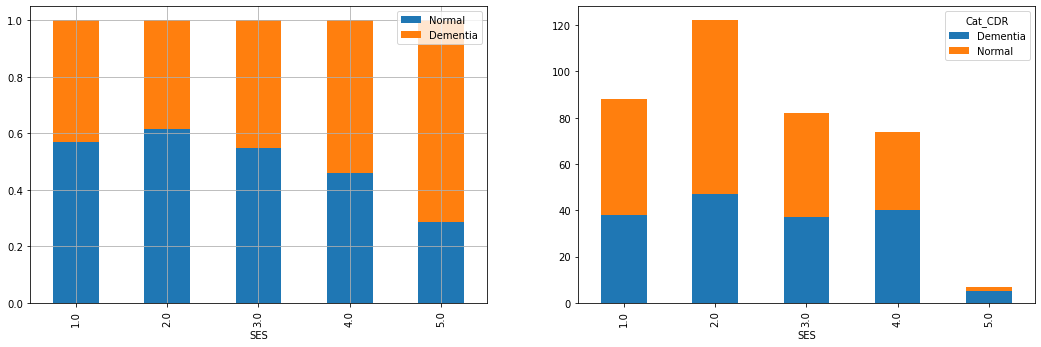

In [150]:
cat_comparison_plot('SES')

From the plot above:
- Highest probability of dementia occured at the lowest level of socio economic status.. which makes sense


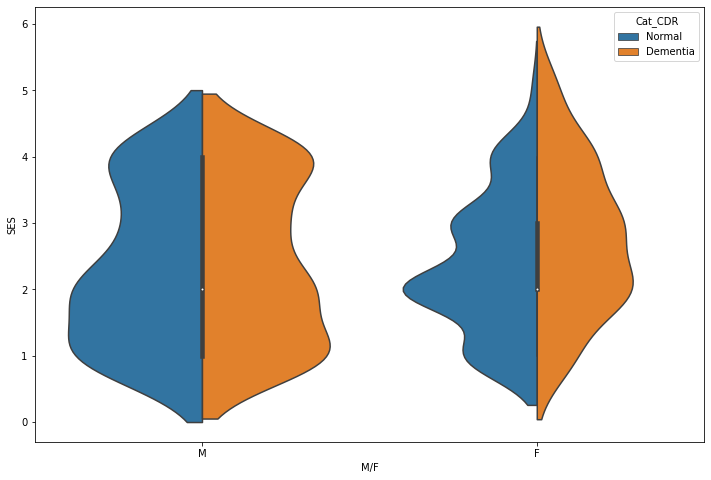

In [151]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

From the Above:
- In Males, the two peaks of dementia occurs at 1(Highest status), and 4(Lower status)
- In Females, highest peak is at 2, and there are slightly less demnetia cases at 1 and 5


### Analysing ASF

ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

In [152]:
dementia_df['ASF'].describe()

count    373.000000
mean       1.195461
std        0.138092
min        0.876000
25%        1.099000
50%        1.194000
75%        1.293000
max        1.587000
Name: ASF, dtype: float64

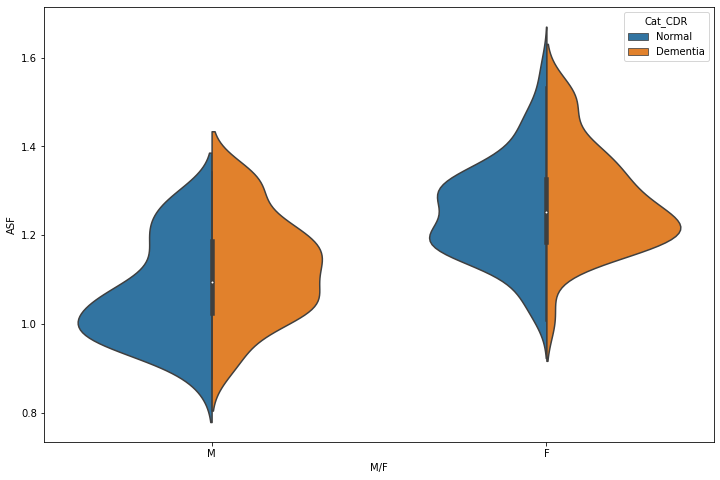

In [153]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="Cat_CDR",split=True, data=dementia_df)
plt.show()

#### Comparing Some features with Cat_MMSE

This is because Cat_MMSE is a measure of Cognitive impairment, which is a good indicator for Dementia

- Comparing Cat_MMSE and ASF

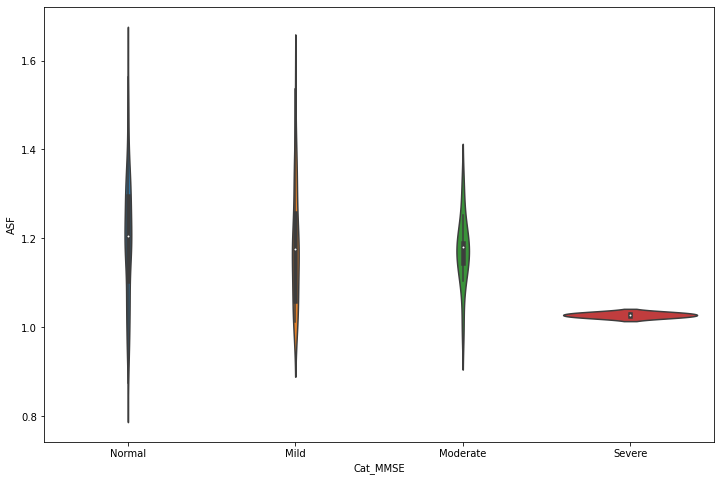

In [97]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cat_MMSE", y="ASF",split=True, data=dementia_df)
plt.show()

From the above:
- In normal subjects, ASF is distributed beween 0.8 and 1.6), but as patients starts showing depreciation in cognitive function, ASF value starts centering around 1 as the cognitive impairment becomes severe

- Comparing Cat_MMSE and nWBV

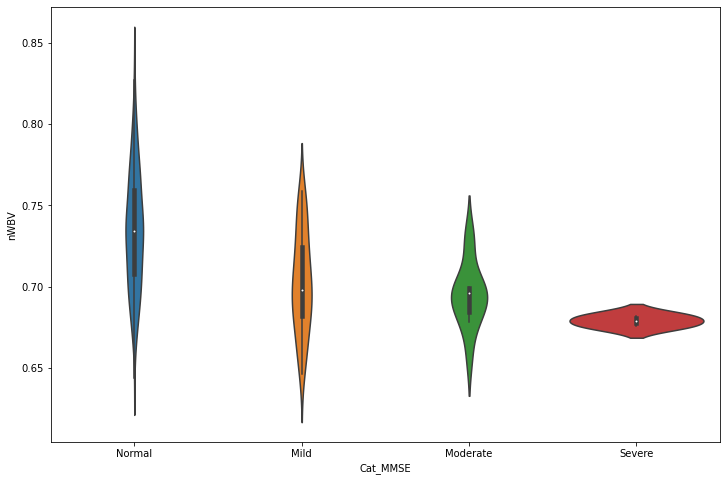

In [154]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cat_MMSE", y="nWBV",split=True, data=dementia_df)
plt.show()

From the Above:
- Similar pattern observed as in the case of ASF
- nWBV centered between 0.65 and 0.70 as cognitive impairment becomes severe

#### Analysing Visit

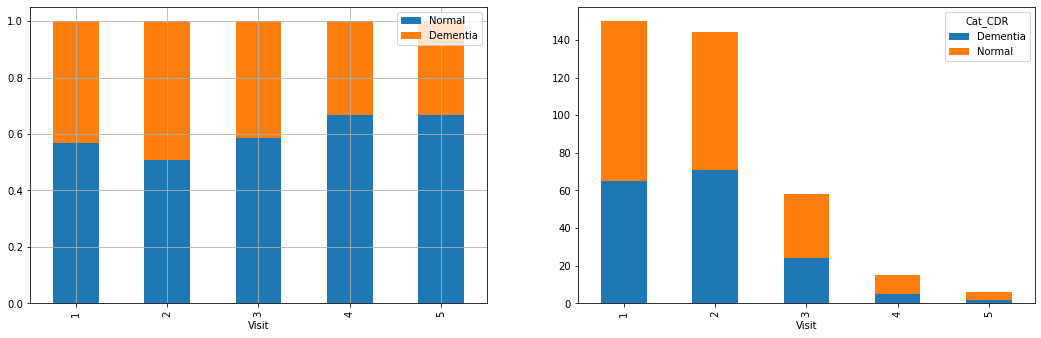

In [155]:
cat_comparison_plot('Visit')

From the above plot
- Subject on their 2nd Visits have the most cases of Dementia

Comparing Visit and Cat_MMSE

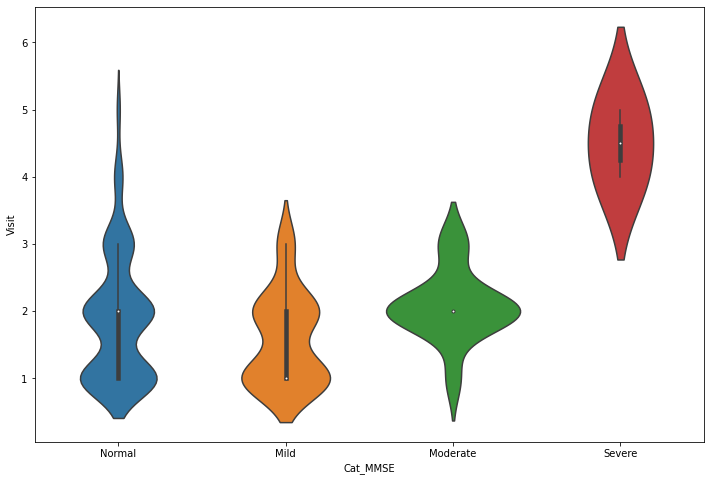

In [156]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="Cat_MMSE", y="Visit",split=True, data=dementia_df)
plt.show()

From the above plot
- Severe case of Cognitive Impairment starts reporting as the number of visits increased to more than 3

### Checking for Multicollinearity

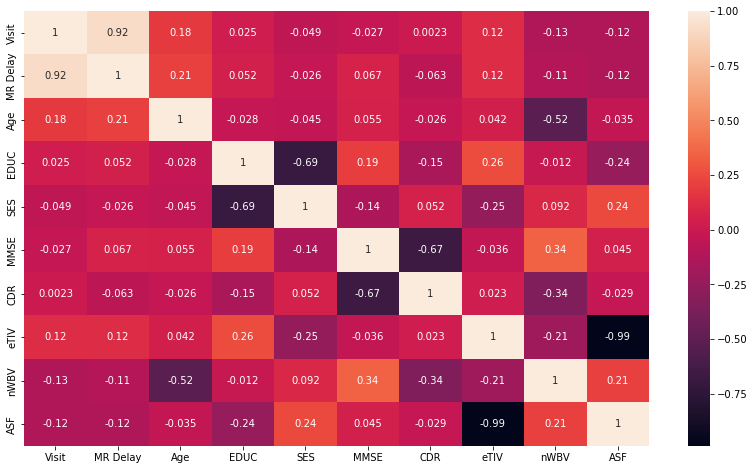

In [157]:
plt.figure(figsize=(14, 8))
sns.heatmap(dementia_df.corr(), annot=True)
plt.show()

- visit and MR Delay are highly correlated
- ASF and eTIV are also highly -ve correlated


Can be looked into during modelling


In [158]:
dementia_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Cat_CDR,Cat_MMSE,Age_group
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal,Normal,80-90
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal,Normal,80-90
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,Dementia,Mild,70-80
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,Dementia,Normal,70-80
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,Dementia,Mild,70-80


#### Final Conclusion

1. Cat_CDR should be the Target column
2. The following Features should be Highly considered for Model Building: [Visit, MR Delay, M/F, AGE, EDUC, SES, MMSE, Cat_MMSE, eTIV, nWBV, ASF,]. Maybe Age_group too as a categorical feature
3. Subject ID, MRI ID, Group, Hand: should be removed

